<a href="https://colab.research.google.com/github/Lainey1225/tmo3/blob/main/classification_Songlin%20Li_%20Ting%20Mo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Preparing Dataset for Classification**

**Group: Songlin Li, Ting Mo**

In [11]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import minmax_scale  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.lines import Line2D


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Added for Assignment
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture
from nltk.cluster.util import cosine_distance
from sklearn import preprocessing
import os



In [12]:
# Functions

# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
# Showing Incorrect Classification
def plot_comp_test_data(X_test, y_test, y_head, title):
    plt.figure(figsize=(12,6))
    plt.scatter(X_test[:,0], X_test[:,6], c=[colors[i] for i in y_head], marker="*", s=60)
    n = np.size(y_head)
    for i in range(0, n):
        if y_head[i] != y_test[i]:
            plt.scatter(X_test[i,0], X_test[i,6], c=[colors[y_test[i]]], marker="X", s=120, alpha=.4)
    legend_elements = [Line2D([0], [0], marker='*', color='w', label='Prediction', markerfacecolor='k', markersize=14),
                       Line2D([0], [0], marker='X', color='w', label='Correct Class', markerfacecolor='k', markersize=12)]
    plt.legend(handles=legend_elements)
    plt.title(title)
    plt.show()

In [13]:
# Defining dataset and browsing content
data = pd.read_csv('https://raw.githubusercontent.com/tleitch/BDML/main/Chateau%20Winery/wine.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
# Show first 10 sample
data.tail(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560


In [15]:
# Split data : X(feature) and y(target) 
X = np.array(data.drop(['Wine'],1))
y = np.array(data['Wine'])
np.shape(y)

(178,)

No handles with labels found to put in legend.


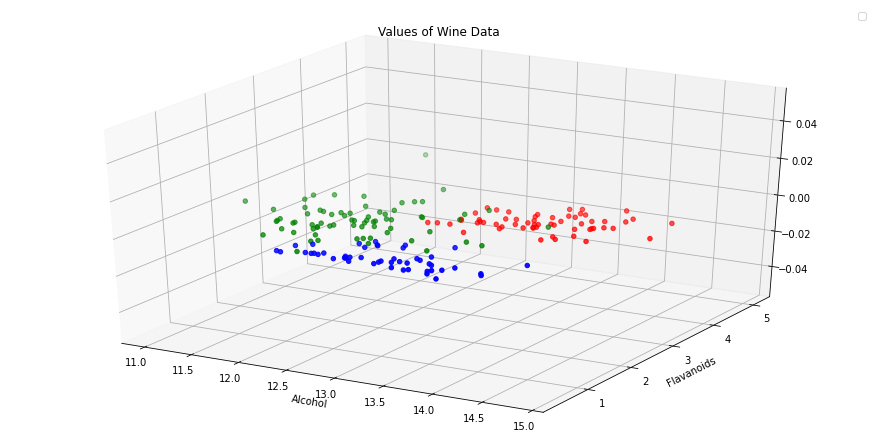

In [16]:
# Visualization Data
fig = plt.figure(1, figsize=(12, 6))
ax = Axes3D(fig)
colors = {1:"r", 2:"g", 3:"b"}
ax.scatter(X[:,0], X[:,6], c=[colors[i] for i in y])
ax.set_xlabel("Alcohol")
ax.set_ylabel("Flavanoids")
plt.title("Values of Wine Data")
ax.legend()
plt.show()

In [17]:
# scaling each feature to a 0 to 1
X = minmax_scale(X)

In [18]:
# Create Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (133, 13)
y_train (133,)
X_test (45, 13)
y_test (45,)


Text(0, 0.5, 'Average Silhouette Score')

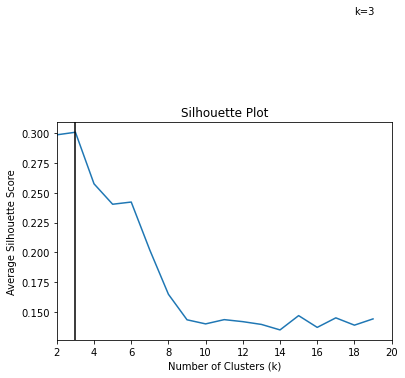

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_scores = [] # Initialize empty list to store silhouette scores

# Loop over different values of k and calculate the average silhouette score
for i in range(2, 20):
    
    # Initialize clustering with k = i
    kmeansI = KMeans(n_clusters=i, random_state=817910)
    
    # Apply clustering
    kmeansI.fit(X)
    
    # Calculate the silhouette score when k = i
    labelsI = kmeansI.fit_predict(X)
    scoreI = silhouette_score(X, labelsI)
    
    # Add silhouette score at k = i to silhouette_scores
    silhouette_scores.append((i, scoreI))
    
# Plot the average silhouette score for each value of k
x1,y1 = zip(*silhouette_scores)
plt.plot(x1, y1)

# Plot a vertical line at whichever k maximizes the silhouette score
maxK = x1[y1.index(max(y1))]
plt.axvline(x=maxK, color="black")
plt.text(18, 0.4, 'k='+str(maxK), color='black')

# Label the chart and the x and y axes
plt.title("Silhouette Plot")
plt.xlabel("Number of Clusters (k)")
plt.xlim([2,20])
plt.ylabel("Average Silhouette Score")

## **k-Nearest Neighbors (k-NN) Classification**

In [20]:
# Create k-NN classification model with GridSearchCV
# n_neighbors: Number of neighbors to use
# weights: weights is used for distance function (uniform: All points in each neighborhood are weighted equally ||
#                                                 distance: Weight points by the inverse of their distance.)
# p: Power parameter for calculate distance. (1: Manhattan Distance. 2: Eucledian Distance. 3 and upper: Minkowski Distance.)
knn_grid = {"n_neighbors":np.arange(1,15), "weights":["uniform", "distance"], "p":[1, 2, 3] }
knn = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=10, iid=False)
knn.fit(X_train, y_train)

print("k-NN Tuned Hyperparameters", knn.best_params_)
print("k-NN Tuned Best Score:", round(knn.best_score_,3))

k-NN Tuned Hyperparameters {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
k-NN Tuned Best Score: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [21]:
# Use best classification model
best_clf_knn = knn.best_estimator_
best_clf_knn.fit(X_train, y_train)
knn_y_head = best_clf_knn.predict(X_test)
print("k-Nearest Neighbors (k-NN) Classification Accuracy: {}%" .format(round(best_clf_knn.score(X_test, y_test)*100,2)))

k-Nearest Neighbors (k-NN) Classification Accuracy: 93.33%


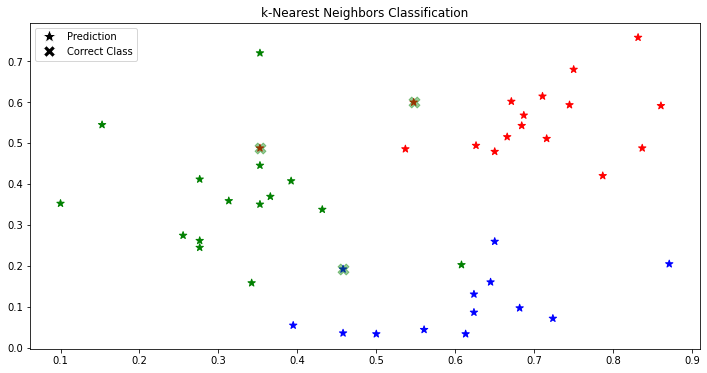

In [22]:
# Show Incorrect Classification
plot_comp_test_data(X_test, y_test, knn_y_head,title="k-Nearest Neighbors Classification")

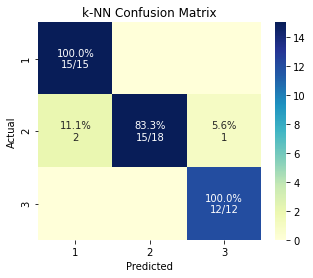

In [23]:
# Show Confusion Matrix
plot_cm(y_test, knn_y_head, title="k-NN Confusion Matrix")

**KNN CV example code here**

In [24]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


Accuracy: 0.965 (0.024)


In [25]:
scores

array([0.97222222, 0.97222222, 0.94444444, 0.97142857, 0.97142857,
       0.97222222, 0.91666667, 0.97222222, 1.        , 0.94285714,
       0.97222222, 0.91666667, 0.97222222, 1.        , 0.97142857])

**Hw Part 1 - Using knn cross valididated example, add  CV analysis to DT and random Forest**

## ** Decision Tree (DT) Classification**

In [26]:
# Create DT classification model with GridSearchCV
# criterion: The function to measure the quality of a split. (Gini: Gini impurity. || Entropy: Information gain)
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
dtree_grid = {"criterion":["gini", "entropy"], "min_samples_split":[3,4,5,6,7,8,9,10], "min_samples_leaf":[1,2,3,4,5,6,7,8,9]}
dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), dtree_grid, cv=10, iid=False)
dtree.fit(X_train, y_train)

print("DT Tuned Hyperparameters", dtree.best_params_)
print("DT Tuned Best Score:", round(dtree.best_score_,3))

DT Tuned Hyperparameters {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 3}
DT Tuned Best Score: 0.946


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [27]:
# Use best classification model
best_clf_dt = dtree.best_estimator_
best_clf_dt.fit(X_train, y_train)
dtree_y_head = best_clf_dt.predict(X_test)
print("Decision Tree (DT) Classification Accuracy: {}%" .format(round(best_clf_dt.score(X_test, y_test)*100,2)))

Decision Tree (DT) Classification Accuracy: 88.89%


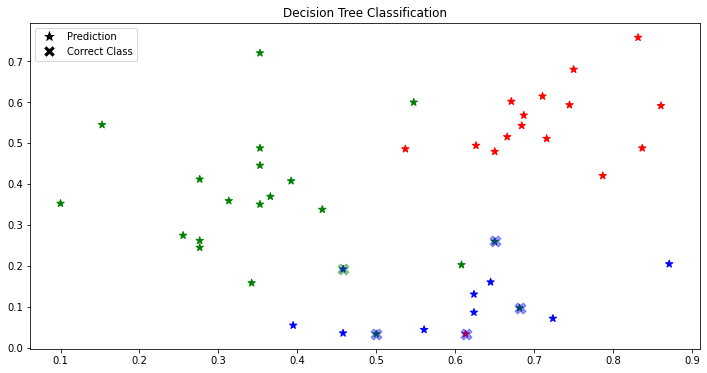

In [28]:
# Show Incorrect Classification
plot_comp_test_data(X_test, y_test, dtree_y_head, title="Decision Tree Classification")

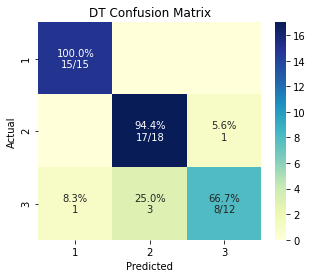

In [29]:
# Show Confusion Matrix 
plot_cm(y_test, dtree_y_head, title="DT Confusion Matrix")

In [30]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(dtree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.918 (0.049)


In [31]:
scores

array([0.94444444, 0.94444444, 0.91666667, 0.91428571, 0.88571429,
       0.91666667, 0.80555556, 0.94444444, 0.94285714, 0.97142857,
       0.94444444, 0.80555556, 0.94444444, 0.97142857, 0.91428571])

## ** Random Forest (RF) Classification**

In [32]:
# Create RF classification model with GridSearchCV
# n_estimators: The number of trees in the forest.
# criterion, min_samples_split and min_samples_leaf are same to decision tree parameters.
rf_grid = {"n_estimators": [50, 100, 150], "criterion": ["gini", "entropy"],
           "min_samples_split":[3,4,5,6,7,8,9,10], "min_samples_leaf":[1,2,3,4,5,6,7,8,9]}
rforest = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=10, iid=False)
rforest.fit(X_train, y_train)

print("RF Tuned Hyperparameters", rforest.best_params_)
print("RF Tuned Best Score:", round(rforest.best_score_,3))

RF Tuned Hyperparameters {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
RF Tuned Best Score: 0.977


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [33]:
best_clf_rforest = rforest.best_estimator_
best_clf_rforest.fit(X_train, y_train)
rforest_y_head = best_clf_rforest.predict(X_test)
print("Random Forest (RF) Classification Accuracy: {}%" .format(round(best_clf_rforest.score(X_test, y_test)*100,2)))

Random Forest (RF) Classification Accuracy: 100.0%


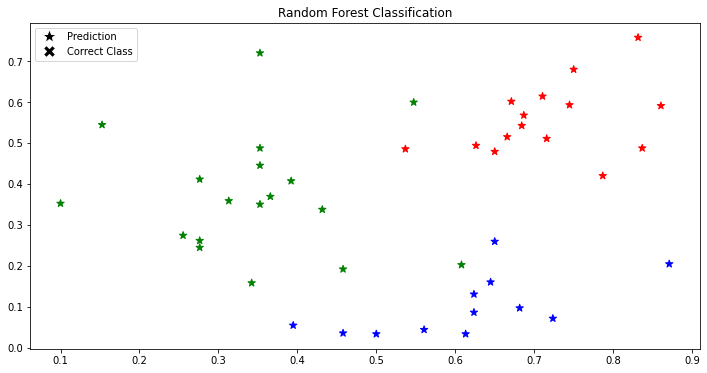

In [34]:
#Show Incorrect Classification
plot_comp_test_data(X_test, y_test, rforest_y_head, title="Random Forest Classification")

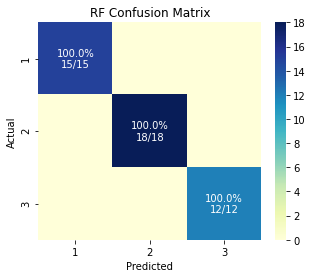

In [35]:
# Show Confusion Matrix
plot_cm(y_test, rforest_y_head, title="RF Confusion Matrix")

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rforest, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [ ]:
scores

**Part 2 - Add your chosen model code here - don't forget to do CV analysis**

For this ignore grid search step in the code above and just take your chosen models defaults

In [37]:
# Create SVC classification model with GridSearchCV
svc_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svc = GridSearchCV(SVC(random_state=42), svc_grid, cv=10, iid=False)
svc.fit(X_train, y_train)

print("SVC Tuned Hyperparameters", svc.best_params_)
print("SVC Tuned Best Score:", round(svc.best_score_,3))

SVC Tuned Hyperparameters {'C': 100, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
SVC Tuned Best Score: 0.985


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [38]:
# Use best classification model
best_clf_svc = svc.best_estimator_
best_clf_svc.fit(X_train, y_train)
svc_y_head = best_clf_svc.predict(X_test)
print("SVC Classification Accuracy: {}%" .format(round(best_clf_svc.score(X_test, y_test)*100,2)))

SVC Classification Accuracy: 97.78%


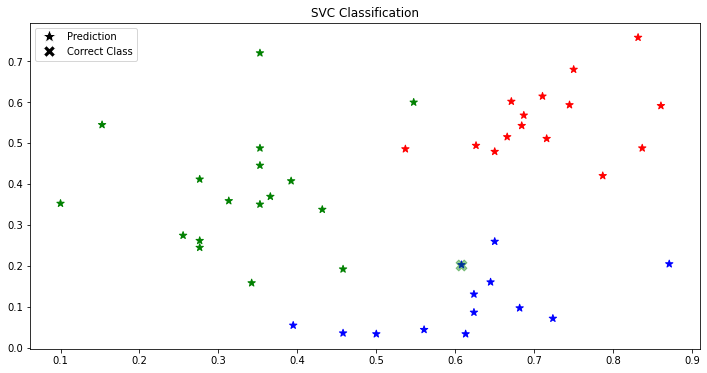

In [39]:
# Show Incorrect Classification
plot_comp_test_data(X_test, y_test, svc_y_head,title="SVC Classification")

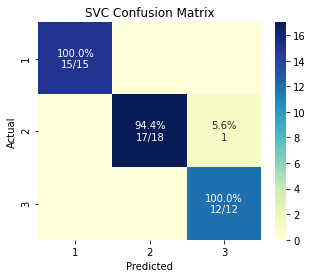

In [40]:
# Show Confusion Matrix
plot_cm(y_test, svc_y_head, title="SVC Confusion Matrix")

In [41]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.963 (0.032)


In [42]:
scores

array([0.94444444, 1.        , 0.94444444, 1.        , 0.91428571,
       1.        , 0.91666667, 0.97222222, 1.        , 0.94285714,
       0.97222222, 0.91666667, 0.94444444, 1.        , 0.97142857])